# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:

# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import renders as rs

import warnings

warnings.filterwarnings('ignore')

from IPython.display import display # Allows the use of display() for DataFrames

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

data.describe()


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: We can expect that PCA will detect primary and secondary vectors that explains the data variace.
Data will probably be explained in just first two dimmensions. By using PCA we will be able to reduce these 6 variables to just the two of them that best captures that information. By having smaller number of dimmensions we will be able to visulize the data better.

Based on Standard Diveation of the values Fresh column has highers value followed by grocery and Milk. The Primary vector will be composed based on this variation.

ICA will find vectors which are statisticly separate from eachother by "whitnening" the overlap in data and separating each vector into a separate signal.

Using ICA will be useful in separating data in preparation for clustering if we can not find clearly seperable boundries. 




In [2]:
from sklearn import preprocessing
stnd = preprocessing.StandardScaler()
data_stnd = stnd.fit_transform(data)

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

indices = [60,110,160]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)



### Outlier detection

In [3]:
all_outliers = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))


all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]

#print outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

###PCA

explained_variance_ratio_ [ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


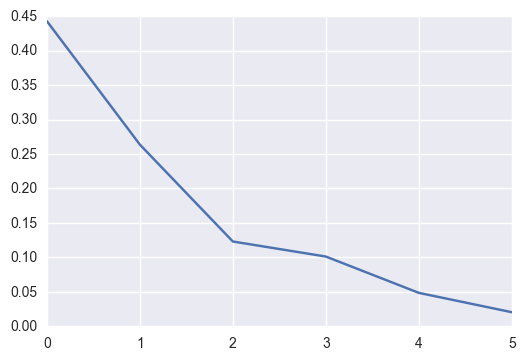

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])


pca.fit(good_data)
pca_dt = pca.transform(good_data)

pca_df = pd.DataFrame(pca_dt , columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
#restrict the Dataframe to first 3 



# Print the components and the amount of variance in the data contained in each dimension
#print 'components_', pca.components_
print 'explained_variance_ratio_', pca.explained_variance_ratio_
print plt.plot(pca.explained_variance_ratio_)
#plt.legend()


To interpret each component, we must compute the correlations between the original data for each variable and each principal component.


These correlations are obtained using the correlation procedure. In the variable statement we will include the first three principal components, PC1, PC2, and PC3, in addition to all six of the original variables. We will use these correlations between the principal components and the original variables to interpret these principal components.

Because of standardization, all principal components will have mean 0. The standard deviation is also given for each of the components and these will be the square root of the eigenvalue.

We want to examine correlations between Principal components and the origianal values. 

To interpret principal components we look at which variables are most strongly correlated to each other (which number are large in magnitude - furthest from zero in either direction) 

Here a correlation value above +-0.5 is deemed important. 

#### PC1
The first principal componnent is strongly correlated to 3 of the 6 original variables. The first principal component decreases with Milk, Detergent & Paper and Grocery. This suggest that these 3 categories varry together. 

This component can be viewed as retailers intrest in Milk, Detergent & Paper and Grocery

#### PC2
The second Principal Component decreases with Delicatesen Fresh, Frozen and Frozen. 

#### PC3
Is made up from Delicatesen and on the oposit side fresh. 



**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: We see that the first PC already explains  44% of the variance, while the second one accounts for another 28% for a total of almost 72% between the two of them. Third dimmension is responisble for 12% for 84%.

I am going to choose 3 dimmensions for my anlyses as they explain 88% of variance.




(-3, 1.5)

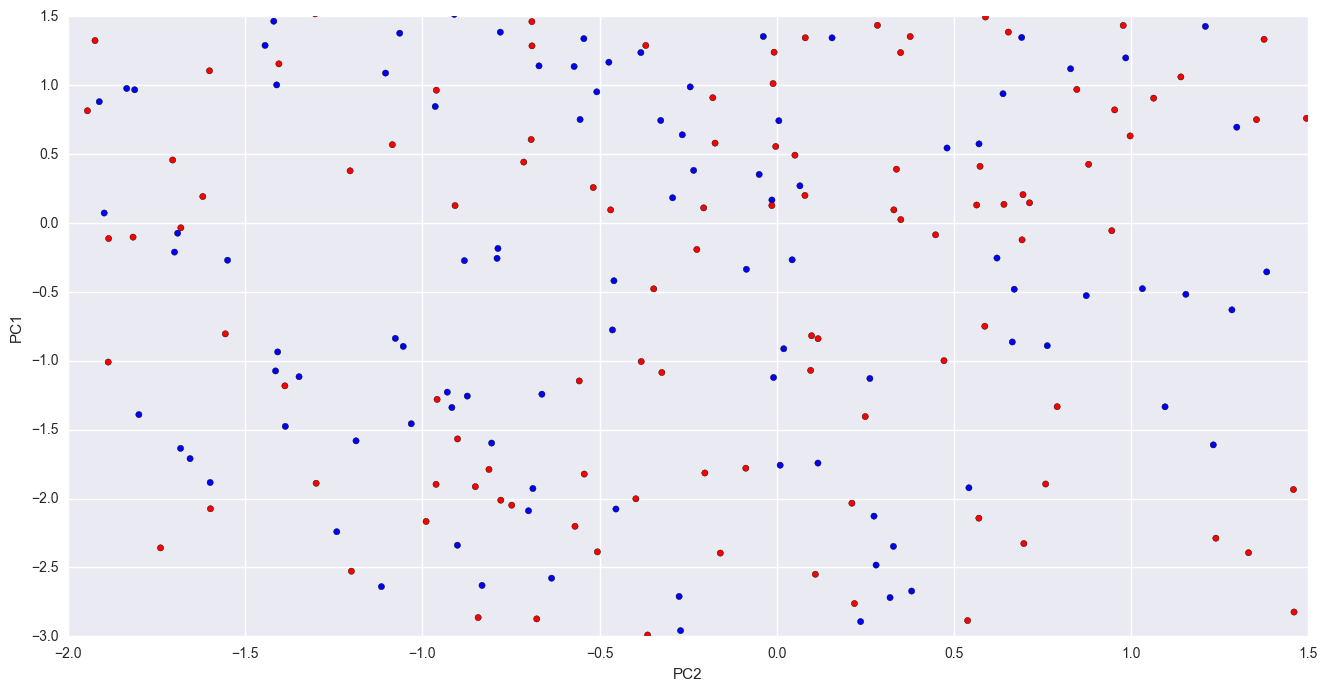

In [5]:

ax = pca_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8), c=['b', 'r'], marker=u'o')
ax.set_xlim (-2, 1.5)
ax.set_ylim (-3, 1.5)

# most of the variance is along the PC1 exis 


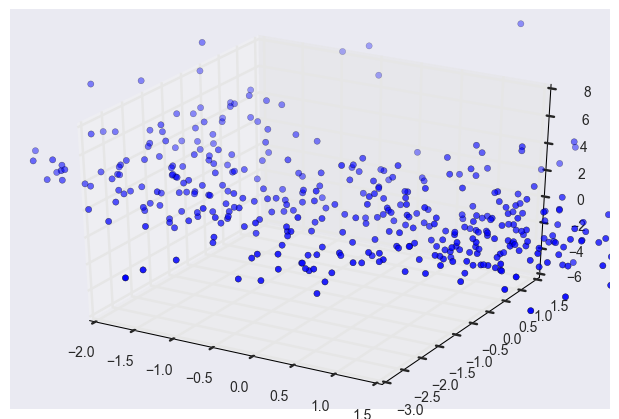

In [6]:
#attempting to make 3D plot with our 3 variables

from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pylab.figure()
ax = Axes3D(fig)



ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c=['b', 'r'], marker='o', )

ax.set_xlim (-2, 1.5)
ax.set_ylim (-3, 1.5)




pyplot.show()

In [15]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [18]:
# K-MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=29).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
print("KMeans score", score)
# score by number of clusters for kmeans
# 2 => 0.42628101546910835
# 3 => 0.39298741109609803
# 4 => 0.33119558416124728
# 5 => 0.35220887435264298
# 6 => 0.36592432818845433
# 7 => 0.36356114623188507
# 8 => 0.3520412601904655
# 9 => 0.35413715207997704
# 10 => 0.35960631967654488

('KMeans score', 0.42628101546910835)


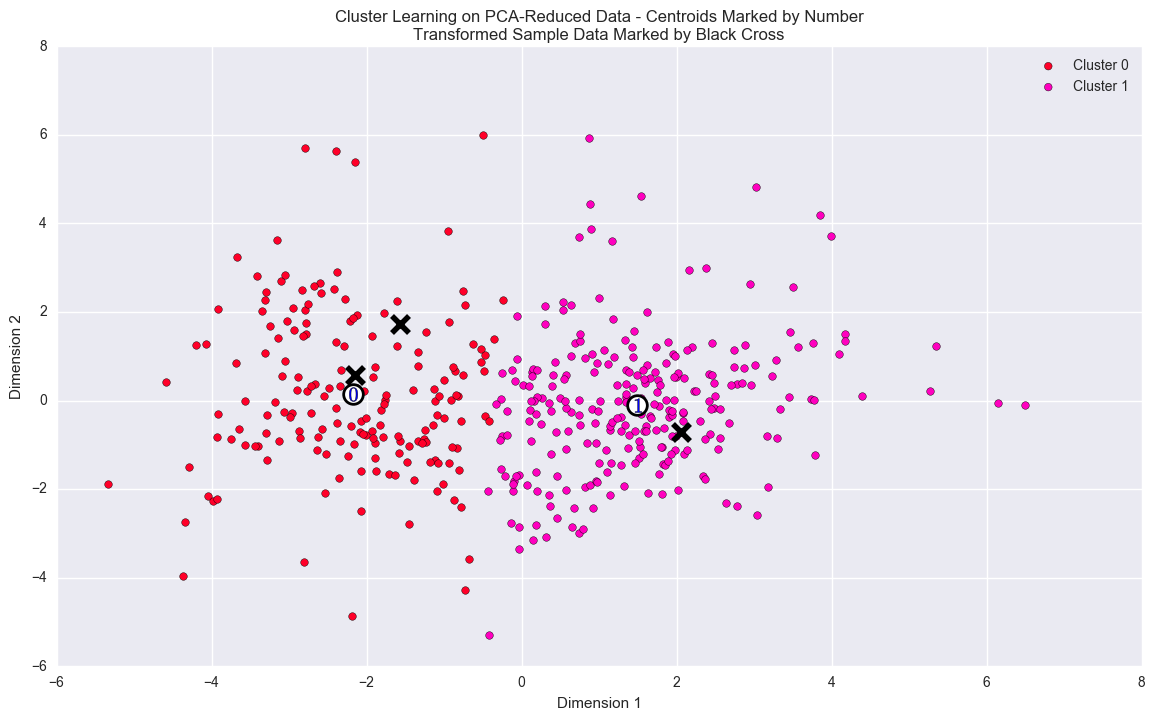

In [9]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: After applying PCA I have applied clustering. Fine tuning the number of clusters parameters, I can observe that the data is separted in four different clusters. Majority of the custores are in the Detergent_Paper and Grocery  

First two Dimmensions of PCA are two dimmensions that explain majority (86%) of variance in data. This is done by combining information from number of different original dimmensions to produce new dimmensions.  We can use this new dimmensions to represent the data in further machine learning algoritams, having advantage that we have reduced dimmensionality.   


From Above biplot we can see that customers can be grouped in 3-4 groups.

Detergent_Paper and Grocery
Milk 
Delicatessen 
Frozen 

The First Component places approximatly equal weight to Detergent_Paper and Grocery
Milk and much less weight to Delicatessen and Frozen 

The second component places most of its weight on Delicatessen & Frozen 

From this we can see that Detergent_Paper, Grocery and Milk are correlated to each other while Delicatesen and 
Frozen are in a category of their own.

By examining the differences between the customers via two principal components. Vectors suggest that Customers with high demand for Detergent / paper / Grocery and milk have little demand for frozen and about 25% of demand for Delicatessen

We can use PCA componenets to visualize the data in two dimmension while retaining most of the charatersitic of the original data.

###ICA

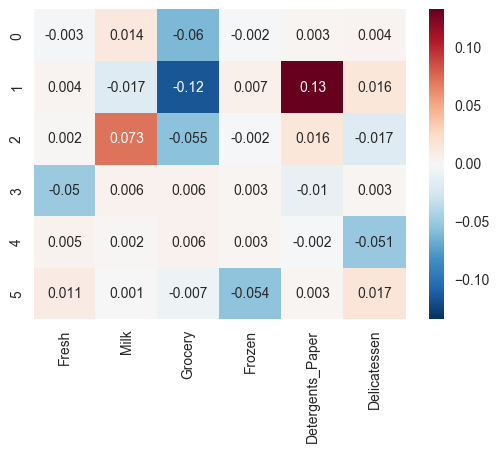

In [10]:

# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing


ica = FastICA(random_state=311)

stnd = preprocessing.StandardScaler()
ica_scale = preprocessing.StandardScaler()
ica_data = stnd.fit_transform(data_stnd)


S_ = ica.fit_transform(data_stnd)
A_ = ica.mixing_


assert np.allclose(ica_data, np.dot(S_, A_.T) + ica.mean_)


ica_data= pd.DataFrame(ica.components_,columns=data.columns).round(3)
sns.heatmap(ica_data, annot=True)


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

From the heat map above we will examine how each of the origianl componnetnts relate to recovered data trhough ICA.

We can see that:
- First component primarly conists of Grocery
- Second componnent consits of Detergent_Paper and inversly of Grocery
- Third componnent consits of Milk and Grocery
- Fourth Componnet Is primerly Fresh 
- Fifth componnet mostly consits of Delicatesn 
- Final Sixth component is mostly Frozen.


These componenets can be used to reduce the feature set into new ones that are statistically independent from one another. This can be useful in Clustering as it can help visually separting the customer segments.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.



###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

-

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [11]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [16]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
print reduced_data[:10]  # print upto 10 elements

   Dimension 1  Dimension 2
0    -1.757983     0.009711
1    -1.788665    -0.812251
2    -1.883353    -1.599135
3     1.155265    -1.405201
4    -0.784786    -2.394294
5    -1.085043    -0.324315
6    -1.128640     0.262863
7    -1.567236    -0.901014
8    -0.863567     0.664968
9    -2.873382    -0.677438


## Implementation: Data Recovery

In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments

print "Actual cluster centers"
display(true_centers)

good_unscaled_data = data.drop(data.index[outliers]).reset_index(drop = True)
print "mean values"
display(np.around(good_unscaled_data.mean().values))
print "median values"
display(np.around(good_unscaled_data.median().values))

print "Centers offset from mean"
display(true_centers - np.around(good_unscaled_data.mean().values))

print "Centers offset from median"
display(true_centers - np.around(good_unscaled_data.median().values))

Actual cluster centers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


mean values


array([ 12089.,   5788.,   7911.,   3096.,   2848.,   1537.])

median values


array([ 8565.,  3634.,  4757.,  1541.,   813.,   967.])

Centers offset from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-8084.0,2112.0,4193.0,-2144.0,1713.0,-501.0
Segment 1,-3222.0,-3891.0,-5434.0,-1008.0,-2554.0,-856.0


Centers offset from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4560.0,4266.0,7347.0,-589.0,3748.0,69.0
Segment 1,302.0,-1737.0,-2280.0,547.0,-519.0,-286.0


In [22]:
#TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn.mixture import GaussianMixture 
#GMM =  GaussianMixture()

clusters =  GaussianMixture(n_components=3).fit(reduced_data)
# clusters = GMM(n_components=3).fit(reduced_data)
# clusters = KMeans(n_clusters=2).fit(reduced_data)
# clusters = KMeans(n_clusters=3).fit(reduced_data)
print clusters

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


In [26]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data['Dimension 1'].min() , reduced_data['Dimension 1'].max() 
y_min, y_max = reduced_data['Dimension 2'].min() , reduced_data['Dimension 2'].max() 
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [27]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
# centroids = clusters.cluster_centers_
print centroids

[[-2.27761367  0.10719722]
 [ 1.17792711 -0.46220755]
 [ 1.36212676  0.71791426]]


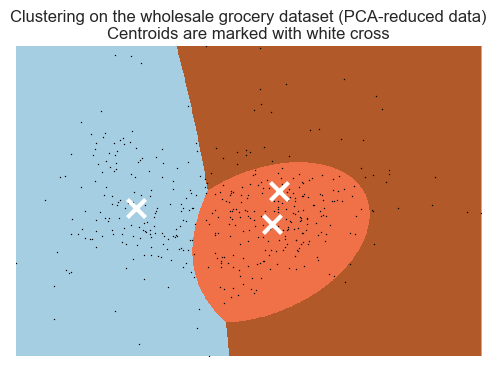

In [28]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data['Dimension 1'], reduced_data['Dimension 2'], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: From PCA we idntified 3 grouping / correlations and I used this value as K . We can see that certain our customers can be devided in 3 such goroups as well.

Majority of the customers are in tow top right cluster, I would describe this as wholesale  / large customer.

Second group of the customers I would describe as Grocery stores mainly purchasing Detergents & paper, Gorcieries and Milk.

Third group I would clasify as Conveniance sotres (7 Eleven's, etc) purchasing wide range of products in samller quenties 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PCA gave me most insight by enabling visulization of the customers in addition to KMeans clustering where I was able to assing clustes to individual customers.

Overall I found that Gaussian Mixture Model (GMM) provides more logical clustering of the data as Kmeans wasn't able to find a clear devide in the clusters.  


**9)** How would you use that technique to help the company design new experiments?

Answer: We could use results of PCA as input parameters in regression, or other types of clusters. Having the abilty to cluster the customers we can treat them as groups of customers on which we can apply different experiments. Such as trying to preidct  how would spending change if demand for one of the groups of products is changed.

Additionlly by assinging customers to cluster we can design A/B tests where we are able to target  specific market segments. What is important to wolesellers may not important to convenieance store owners. 

**10)** How would you use that data to help you predict future customer needs?

Answer: By seeing what type of products customers are intersted and this can influence how we interact with them. For example we can target only speficic segment of our customers with special discounts and incentives. 

Using the cluster assingment in addition to previous purchase we can predit the affect of certain incetives such as discounts to total increase of sales. 

Refernces:
K-Means Clustering Overview -  http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm